In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# 가상의 클러스터 데이터 생성
x, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()

In [3]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self,x):
        out = self.linear(x)
        return out

In [4]:
input_size = 2
num_classes = 3

model = SoftmaxRegression(input_size,num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
num_epochs = 1000
for epoch in range(num_epochs):
    output = model(x)
    loss = criterion(output, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0 :
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss:.2f}')
              

Epoch: 100/1000, Loss: 0.05
Epoch: 200/1000, Loss: 0.03
Epoch: 300/1000, Loss: 0.02
Epoch: 400/1000, Loss: 0.01
Epoch: 500/1000, Loss: 0.01
Epoch: 600/1000, Loss: 0.01
Epoch: 700/1000, Loss: 0.01
Epoch: 800/1000, Loss: 0.01
Epoch: 900/1000, Loss: 0.01
Epoch: 1000/1000, Loss: 0.01


C:\anaconda3\envs\condatorch\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


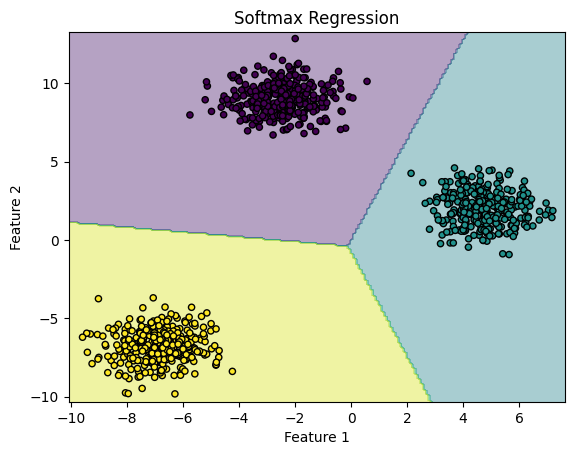

In [6]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
Z = model(torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)).argmax(dim=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Softmax Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()